<a href="https://colab.research.google.com/github/AWTT237/ASSIGNMENT2/blob/main/ASS12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to [0,1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten labels
y_train = y_train.flatten()
y_test = y_test.flatten()

# Class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


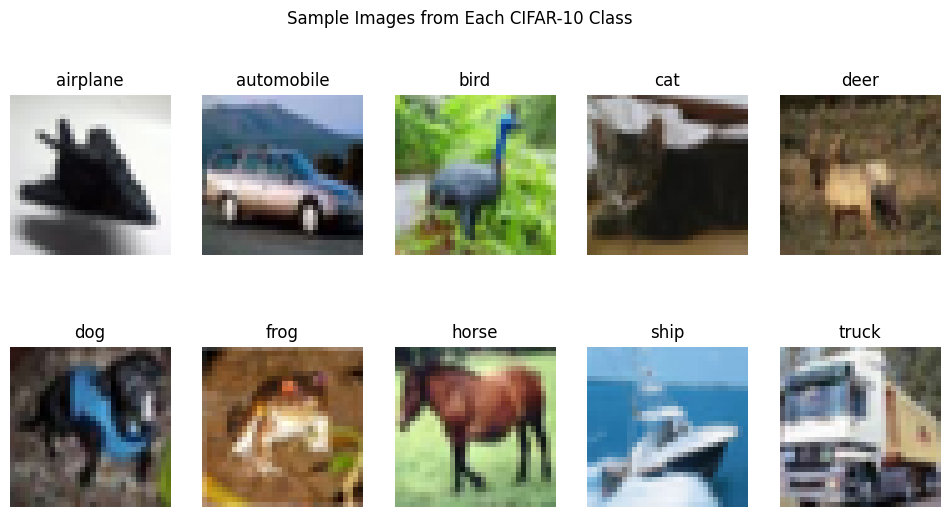

In [2]:
plt.figure(figsize=(12,6))
for i in range(10):
    # Get first image of class i
    idx = np.where(y_train == i)[0][0]
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[idx])
    plt.title(class_names[i])
    plt.axis('off')
plt.suptitle("Sample Images from Each CIFAR-10 Class")
plt.show()


In [3]:
# Normalization
# Assume CIFAR-10 dataset is loaded
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

print("Pixel value range after normalization:")
print("X_train:", X_train.min(), "to", X_train.max())
print("X_test:", X_test.min(), "to", X_test.max())


Pixel value range after normalization:
X_train: 0.0 to 1.0
X_test: 0.0 to 1.0


In [4]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 as an example
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to [0,1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten images for feedforward network (dense layers)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# One-hot encode labels
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

print("Training data shape:", X_train_flat.shape)
print("Test data shape:", X_test_flat.shape)


Training data shape: (50000, 3072)
Test data shape: (10000, 3072)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build a simple feedforward neural network
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_flat.shape[1],)),  # hidden layer 1
    Dropout(0.3),                                                         # dropout to reduce overfitting
    Dense(256, activation='relu'),                                        # hidden layer 2
    Dropout(0.3),
    Dense(10, activation='softmax')                                        # output layer
])

# Summary of the model
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [7]:
history = model.fit(
    X_train_flat, y_train_cat,
    batch_size=64,
    epochs=15,
    validation_split=0.2,   # 20% of training data used for validation
    verbose=1
)


Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 34ms/step - accuracy: 0.2066 - loss: 2.1694 - val_accuracy: 0.3060 - val_loss: 1.9429
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.2848 - loss: 1.9401 - val_accuracy: 0.3444 - val_loss: 1.8544
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.3091 - loss: 1.8886 - val_accuracy: 0.3476 - val_loss: 1.8194
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.3213 - loss: 1.8573 - val_accuracy: 0.3515 - val_loss: 1.7994
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - accuracy: 0.3234 - loss: 1.8462 - val_accuracy: 0.3648 - val_loss: 1.7838
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.3303 - loss: 1.8249 - val_accuracy: 0.3564 - val_loss: 1.7826
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.3451 - loss: 1.7942 - val_accuracy: 0.3820 - val_loss: 1.7537
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.3486 - loss: 1.7884 - 

In [8]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test_flat, y_test_cat)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4142 - loss: 1.6642
Test Accuracy: 0.4115


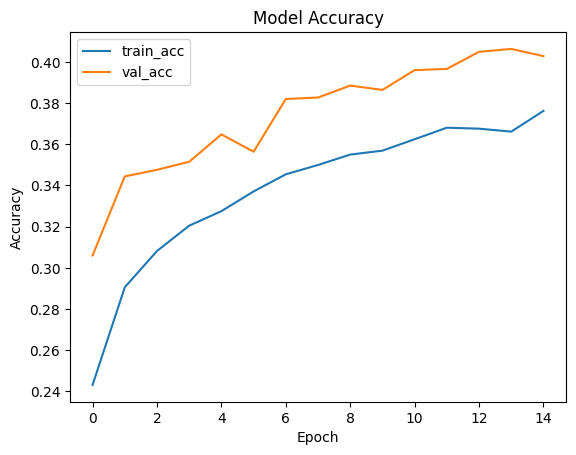

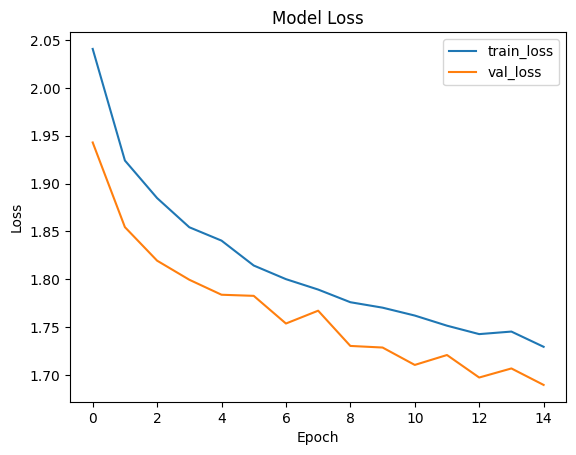

In [9]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [10]:
# Predictions on Test Set
import numpy as np

# Predict probabilities
y_pred_prob = model.predict(X_test_flat)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# True labels (flattened if needed)
y_true = np.argmax(y_test_cat, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [11]:
# Performance Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Accuracy
accuracy = accuracy_score(y_true, y_pred)

# Precision, Recall, F1-score (macro average)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1-score (macro): {f1:.4f}")

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


Test Accuracy: 0.4115
Precision (macro): 0.4168
Recall (macro): 0.4115
F1-score (macro): 0.4000

Classification Report:

              precision    recall  f1-score   support

    airplane       0.49      0.40      0.44      1000
  automobile       0.55      0.41      0.47      1000
        bird       0.34      0.17      0.23      1000
         cat       0.25      0.30      0.27      1000
        deer       0.41      0.21      0.28      1000
         dog       0.37      0.33      0.35      1000
        frog       0.38      0.63      0.47      1000
       horse       0.49      0.47      0.48      1000
        ship       0.42      0.68      0.52      1000
       truck       0.45      0.50      0.48      1000

    accuracy                           0.41     10000
   macro avg       0.42      0.41      0.40     10000
weighted avg       0.42      0.41      0.40     10000



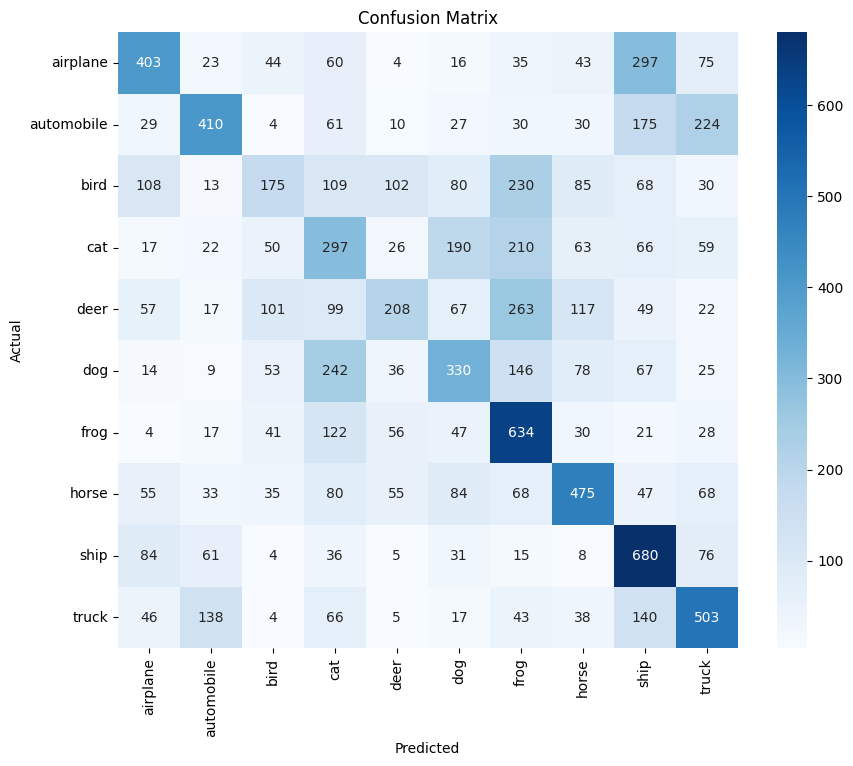

In [12]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [14]:
# Flatten the images for feedforward network
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# One-hot encode labels
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# Build the model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_flat.shape[1],)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(
    X_train_flat, y_train_cat,
    batch_size=64,
    epochs=15,
    validation_split=0.2
)



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 43ms/step - accuracy: 0.2064 - loss: 2.1986 - val_accuracy: 0.3241 - val_loss: 1.8939
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.2878 - loss: 1.9286 - val_accuracy: 0.3478 - val_loss: 1.8074
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.3121 - loss: 1.8671 - val_accuracy: 0.3668 - val_loss: 1.7886
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.3208 - loss: 1.8452 - val_accuracy: 0.3642 - val_loss: 1.7783
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.3300 - loss: 1.8367 - val_accuracy: 0.3776 - val_loss: 1.7777
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.3383 - loss: 1.8053 - val_accuracy: 0.3874 - val_loss: 1.7283
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.3430 - loss: 1.7884 - val_accuracy: 0.3715 - val_loss: 1.7591
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.3448 - loss: 1.7822 - 